In [20]:
import pickle
import gensim
from spec2vec import Spec2Vec
import os
from matchms import calculate_scores
import seaborn as sns

### Example on training documents

In [2]:
documents = pickle.load(open("./models/tbdms/preprocessed/documents.pickle", "rb"))

In [3]:
w2v_model = gensim.models.Word2Vec.load("./models/tbdms/spec2vec.model")
s2v_model = Spec2Vec(w2v_model)

In [4]:
embedding = s2v_model._calculate_embedding(documents[0])
embedding[0:10]

array([15.86876743,  6.17050898, -4.49228144,  5.22535405, -0.61781243,
       14.28316867,  8.40395679, 11.2233543 ,  3.61851081, -7.97188171])

### Example on new data

In [5]:
from spec2vec_train import preprocess_file

In [6]:
w2v_model = gensim.models.Word2Vec.load("./models/tms/spec2vec.model")
s2v_model = Spec2Vec(w2v_model)

In [7]:
FILE = "./dataset/Test dataset_TMS_RAW.mgf"
assert os.path.isfile(FILE), f"File not found: {FILE}"

In [8]:
spectra_documents = preprocess_file(FILE)

In [9]:
spectra_documents_by_inchikey = {}
for sd in spectra_documents:
    inchikey = sd.metadata.get("inchikey")
    if inchikey not in spectra_documents_by_inchikey:
        spectra_documents_by_inchikey[inchikey] = []
    spectra_documents_by_inchikey[inchikey].append(sd)

In [10]:
all_spectra = []
for spectrum in spectra_documents_by_inchikey:
    all_spectra.extend(spectra_documents_by_inchikey[spectrum])

In [11]:
spec2vec_similarity = Spec2Vec(model=w2v_model,
                               intensity_weighting_power=0.5,
                               allowed_missing_percentage=5.0)

In [12]:
scores = calculate_scores(all_spectra, all_spectra, spec2vec_similarity,
                          is_symmetric=True)

In [14]:
scores_matrix = scores.to_array()

<Axes: >

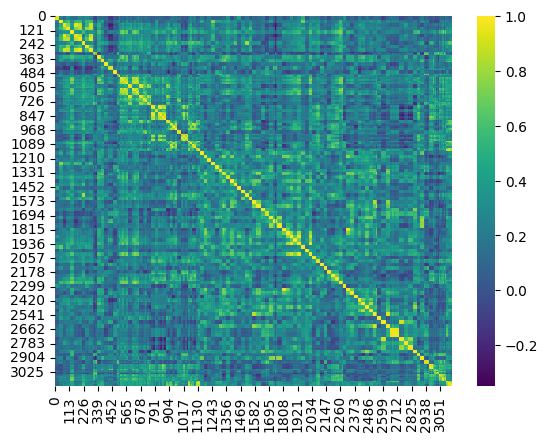

In [21]:
sns.heatmap(scores_matrix, cmap='viridis')